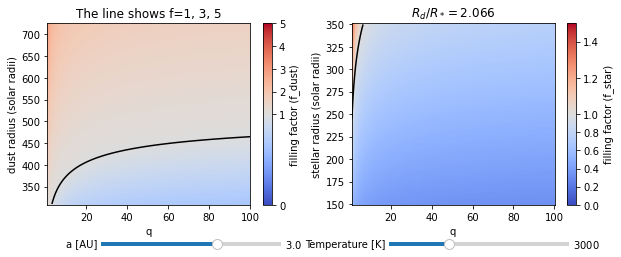

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Dec  8 12:56:32 2023

@author: bcourtne
"""

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.widgets import Slider
from astropy import constants as const
from astropy import units as u

# Define the function that generates the values for the plot
def update_plot(q, R, param):
    Egg = (0.49 * q**(2/3)) / (0.6 * q**(2/3) + np.log(1 + q**(1/3)))
    Rd = R * const.R_sun.cgs.value * u.cm.to(u.au)
    f = Rd / param / Egg
    return f

def update_plot_ratio(param):
    dust_to_star = 1 / (1 - (1 - 2 * (dust_cond_temp/param)**4 )**2 )**0.5     # R_dust/R_star
    return dust_to_star

# Initial values
Period = 757   # in days
Omega = 2 * np.pi / (Period * 86400)   # in rad/s
initial_f_dust = 3.0
initial_temp = 3000  # Initial temperature in Kelvin
dust_cond_temp = 1500
# initial_central_value = 3.0
x_values = np.linspace(1, 100, 500)
initial_dust_to_star = update_plot_ratio(initial_temp)
initial_f_star = initial_f_dust / initial_dust_to_star

# Create the figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
plt.subplots_adjust(bottom=0.25)  # Adjust the bottom to make room for the sliders

# Add sliders for parameter adjustment and temperature
ax_param = plt.axes([0.2, 0.1, 0.25, 0.03], facecolor='lightgoldenrodyellow')
ax_temp = plt.axes([0.6, 0.1, 0.25, 0.03], facecolor='lightgoldenrodyellow')
param_slider = Slider(ax_param, 'a [AU]', 2.1, 3.5, valinit=initial_f_dust)
temp_slider = Slider(ax_temp, 'Temperature [K]', 2000, 5000, valinit=initial_temp)

# Initial y-axis values
y_values_star = np.linspace(150, 350, 100)
y_values_dust = y_values_star * initial_dust_to_star

# Plot the initial surface with a divergent colormap on the first subplot
X, Y_dust = np.meshgrid(x_values, y_values_dust)
Z_dust = update_plot(X, Y_dust, initial_f_dust)
cmap = plt.get_cmap('coolwarm')
divnorm_dust = colors.TwoSlopeNorm(vmin=0., vcenter=1., vmax=5)
divnorm_star = colors.TwoSlopeNorm(vmin=0., vcenter=1., vmax=1.5)
plot1 = ax1.pcolormesh(X, Y_dust, Z_dust, cmap=cmap, norm=divnorm_dust)
contour1 = ax1.contour(X, Y_dust, Z_dust, levels=[1, 3, 5], colors='k', linestyles='solid')
ax1.set(xlabel='q', ylabel='dust radius (solar radii)')
ax1.set_title('The line shows f=1, 3, 5')

# Add colorbar for the first plot
cbar1 = plt.colorbar(plot1, ax=ax1)
cbar1.set_label('filling factor (f_dust)')

# Plot the initial surface with a divergent colormap on the second subplot, for the star
X, Y_star = np.meshgrid(x_values, y_values_star)
Z_star = Z_dust / initial_dust_to_star
plot2 = ax2.pcolormesh(X, Y_star, Z_star, cmap=cmap, norm=divnorm_star)
contour2 = ax2.contour(X, Y_star, Z_star, levels=[1], colors='k', linestyles='solid')
ax2.set(xlabel='q', ylabel='stellar radius (solar radii)')
ax2.set_title(f'$R_d/R_*=${initial_dust_to_star:.3f}')

# Add colorbar for the second plot
cbar2 = plt.colorbar(plot2, ax=ax2)
cbar2.set_label('filling factor (f_star)')

# Function to update the plot when the sliders are moved
def update(val):
    global contour1, contour2
    param = param_slider.val
    temp = temp_slider.val
    dust_to_star = update_plot_ratio(temp)
    y_values_dust = y_values_star * dust_to_star
    X, Y_dust = np.meshgrid(x_values, y_values_dust)
    Z_dust = update_plot(X, Y_dust, param)
    Z_star = Z_dust / dust_to_star

    # # Update the first plot
    # plot1.set_array(Z_dust.flatten())
    # plot1.set_facecolors(cmap(divnorm(Z_dust.flatten())))
    
    if contour1 is not None:
        for coll in contour1.collections:
            coll.remove()
    plot1 = ax1.pcolormesh(X, Y_dust, Z_dust, cmap=cmap, norm=divnorm_dust)
    contour1 = ax1.contour(X, Y_dust, Z_dust, levels=[1, 3, 5], colors='k', linestyles='solid')

    # Update the second plot
    plot2.set_array(Z_star.flatten())
    if contour2 is not None:
        for coll in contour2.collections:
            coll.remove()
    contour2 = ax2.contour(X, Y_star, Z_star, levels=[1], colors='k', linestyles='solid')

    # Reset y-axis limits for both plots
    ax1.set_ylim(y_values_dust.min(), y_values_dust.max())

    ax2.set_title(f'$R_d/R_*=${dust_to_star:.3f}')

    fig.canvas.draw_idle()

# Attach the sliders' update function to the sliders
param_slider.on_changed(update)
temp_slider.on_changed(update)

plt.show()




